### Задача:
#### $ \left\{\begin{matrix}  \frac{dy1}{dx} = 99y1+250y2 
\\  \frac{dy2}{dx} = 40y1+99y2 
\\ y1(0) = A
\\ y2(0) = B
\\ 0<x<D=1
\end{matrix}\right. $
#### $ Y(x) = \binom{y1(x)}{{y2(x)}} \Rightarrow  {Y}' =\binom{{y1}'(x)}{{{y2}'(x)}}=F(x,Y) = \binom{99Y[0] + 250Y[1]}{{40Y[0] + 99Y[1]}} $


### Решение задачи будет осуществляться с помощью неявного метода Эйлера первого порядка:

#### $ y_{n+1}=y_{n}+hf_{1}, $
#### $f_{1} = f(x_{n}+h, y_{n}+hf_{1}), $  
#### $n=0,...,N-1$  

### Проверка порядка аппроксимации:
####  Условие Кутты: $ c_{j} = \sum_{i=1}^{s}{a_{ij}} ,\forall j  $
#### $ p = 1: \sum_{i=1}^{s}{b_{i}} =  b_{1} = 1 $
#### $ p = 2: 2 \sum_{i=1}^{s}{b_{i}}{c_{i}} = 2\cdot 1\cdot 1 = 2\neq 1 \Rightarrow $ метод 1 порядка.

### Устойчивость:
#### Функция устойчивости: $ R(z) = \frac{1}{1-z}, z = \lambda h $
#### Область устойчивости: $\left | R(z) \right | \leq 1, \forall \lambda_{i} $
#### $ \lambda_{1}=199,  \lambda_{2}=-1 \Rightarrow$ метод будет устойчив при h:
#### $\left\{\begin{matrix}  | \frac{1}{1-199 h} | \leq 1
\\  | \frac{1}{1+h} | \leq 1
\end{matrix}\right. \rightarrow h \geq \frac{2}{199}$


### Аналитическое решение:
#### $ y_{1} = \frac{5}{2}(\frac{A}{5} - \frac{B}{2})e^{-x} + \frac{5}{2}(\frac{A}{5} + \frac{B}{2})e^{199x}$
#### $y_{2} = -(\frac{A}{5} - \frac{B}{2})e^{-x} + (\frac{A}{5} + \frac{B}{2})e^{199x}$

In [645]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as ps
from numpy import linalg

arr = np.array([[99, 250], [40, 99]])

def ode_sofa(A, B, D, arr, h):  
    x = np.arange(0, D + h, h)
    N = x.shape[0]
    Y = np.zeros((N, 2))
    Y[0][0] = A  # начальные 
    Y[0][1] = B  # условия
    
    k = np.zeros(2)    
    for n in range(N-1): 
        # решаем уравнение Tk = b 
        b = np.dot(arr, Y[n])
        T = np.eye(2) - arr * h
        k = linalg.solve(T,b)
        Y[n+1] = Y[n] + h * k
    return Y

def table(h, A, B, D):
    x = np.arange(0, D + h, h)
    array = np.zeros((7, 11))
    m = (np.arange(0, D + h, h).shape[0]-1)/10
    for i in range(11):
        array[0][i] = x[int(m*i)]
        array[1][i] = ode_sofa(A, B, D, arr, h)[int(m*i)][0]
        array[2][i] = (A / 5 - B / 2) * np.exp(-x[int(m*i)]) * 5 / 2 + (A / 5 + B / 2) * np.exp(199 * x[int(m*i)]) * 5 / 2
        array[3][i] = np.fabs(array[2][i] - array[1][i])
        array[4][i] = ode_sofa(A, B, D, arr, h)[int(m*i)][1]
        array[5][i] = - (A / 5 - B / 2) * np.exp(-x[int(m*i)]) + (A / 5 + B / 2) * np.exp(199 * x[int(m*i)])
        array[6][i] = np.fabs(array[5][i] - array[4][i])
        rows = ['x', '(y1)', '[y1]', '|dy1|', '(y2)', '[y2]', '|dy2|']
    return array

def view(a, b=None, c=None):
    return ps.DataFrame(a, b, c)

Вывод результатов

In [678]:
# параметры
A = -50
B = 20
D = 1
h = 2/199
view(ode_sofa(A, B, D, arr, h))

,0,1
0,-50.000000,20.000000
1,-49.502488,19.800995
2,-49.009925,19.603970
3,-48.522265,19.408906
4,-48.039456,19.215782
...,...,...
96,-19.144491,7.657796
97,-18.953999,7.581599
98,-18.765402,7.506161
99,-18.578681,7.431473


In [669]:
view(table(h, A, B, D), ['x', '(y1)', '[y1]', '|dy1|', '(y2)', '[y2]', '|dy2|'])

,0,1,2,3,4,5,6,7,8,9,10
x,0.0,0.099497,1.989950e-01,2.984925e-01,3.979899e-01,4.974874e-01,5.969849e-01,6.964824e-01,7.959799e-01,8.954774e-01,1.000503e+00
(y1),-50.0,275.899900,3.211769e+20,3.211769e+38,3.211769e+56,3.211769e+74,3.211769e+92,3.211769e+110,3.211769e+128,3.211769e+146,-3.211769e+165
[y1],-50.0,-45.264611,-4.097770e+01,-3.709679e+01,-3.358344e+01,-3.040283e+01,-2.752344e+01,-2.491676e+01,-2.255695e+01,-2.042063e+01,-1.838473e+01
|dy1|,0.0,321.164511,3.211769e+20,3.211769e+38,3.211769e+56,3.211769e+74,3.211769e+92,3.211769e+110,3.211769e+128,3.211769e+146,3.211769e+165
(y2),20.0,146.581572,1.284708e+20,1.284708e+38,1.284708e+56,1.284708e+74,1.284708e+92,1.284708e+110,1.284708e+128,1.284708e+146,-1.284708e+165
[y2],20.0,18.105844,1.639108e+01,1.483872e+01,1.343338e+01,1.216113e+01,1.100938e+01,9.966703e+00,9.022779e+00,8.168252e+00,7.353892e+00
|dy2|,0.0,128.475727,1.284708e+20,1.284708e+38,1.284708e+56,1.284708e+74,1.284708e+92,1.284708e+110,1.284708e+128,1.284708e+146,1.284708e+165


In [676]:
def N(h):
    return 1+D/h

def table2(n):
    array = np.zeros((3, 2*n - 1)) # для вывода нормы и шага, n - кол-во возможных шагов
    norm_array = [] # вспомогательный
    h = 2/199
    for i in range(0, n):
        h = h*(0.55 + i*0.05)
        array[0][n - 2 - i] = h*(0.55 + i*0.05)
        array[1][n - 2 - i] = N(h)
        norm_array.insert(0, max([max(table(h, A, B, D)[3][:]), max(table(h, A, B, D)[6][:])]))
        h = 2/199
    for i in range(n, 2*n - 1):
        array[0][i] = h
        array[1][i] = N(h)
        norm_array.append(max([max(table(h, A, B, D)[3][:]), max(table(h, A, B, D)[6][:])]))
        h = h * 2
    array[2] = norm_array
    return view(array,  ['h', 'кол-во узлов','||y||'])#, ['h x 1', 'x 2', 'x 4', 'x 8', 'x 16', 'x 32', 'x 64'])
table2(7)

,0,1,2,3,4,5,6,7,8,9,10,11,12
h,0.006432,5.653266e-03,4.924623e-03,4.246231e-03,3.618090e-03,3.040201e-03,0.000000e+00,0.010050,0.020101,0.040201,0.080402,0.160804,0.321608
кол-во узлов,125.375000,1.336667e+02,1.431429e+02,1.540769e+02,1.668333e+02,1.819091e+02,0.000000e+00,100.500000,50.750000,25.875000,13.437500,7.218750,4.109375
||y||,2233.805422,8.964694e+12,1.781446e+25,4.731423e+41,1.394980e+64,3.867472e+100,3.211769e+165,0.092047,0.183333,0.363670,0.715548,1.384463,2.607666


In [680]:
def N(h):
    return int(1+D/h)

array = np.zeros((3, 11)) # для вывода нормы и шага, n - кол-во возможных шагов
norm_array = [] # вспомогательный
h = 2/199
for i in range(0, 4):
    h = h*(0.55 + i*0.05)
    array[0][i] = h
    array[1][i] = N(h)
    norm_array.append(max([max(table(h, A, B, D)[3][:]), max(table(h, A, B, D)[6][:])]))
    h = 2/199
for i in range(4, 11):
    array[0][i] = h
    array[1][i] = N(h)
    norm_array.append(max([max(table(h, A, B, D)[3][:]), max(table(h, A, B, D)[6][:])]))
    h = h * 2
array[2] = norm_array
view(array,  ['h', 'кол-во узлов','||y||'])#, ['h x 1', 'x 2', 'x 4', 'x 8', 'x 16', 'x 32', 'x 64'])


,0,1,2,3,4,5,6,7,8,9,10
h,5.527638e-03,6.030151e-03,6.532663e-03,7.035176e-03,0.010050,0.020101,0.040201,0.080402,0.160804,0.321608,0.643216
кол-во узлов,1.810000e+02,1.660000e+02,1.540000e+02,1.430000e+02,100.000000,50.000000,25.000000,13.000000,7.000000,4.000000,2.000000
||y||,3.211769e+165,3.867472e+100,1.394980e+64,4.731423e+41,0.092047,0.183333,0.363670,0.715548,1.384463,2.607666,4.704694


График численного решения:

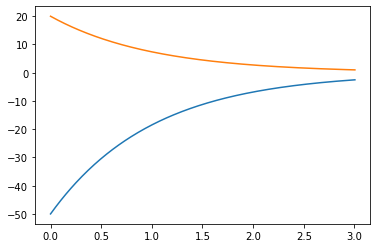

In [639]:
x = np.arange(0, D+h, h)
array = ode_sofa(A, B, D, arr, h)
plt.plot(x, array.T[0])
plt.plot(x, array.T[1])
#plt.axis([0,D,0,10])

График аналитического решения:

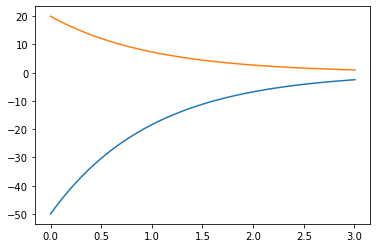

In [640]:
x = np.arange(0, D + h, h)
y1 = (A / 5 - B / 2) * np.exp(-x) * 5 / 2 + (A / 5 + B / 2) * np.exp(199*x) * 5 / 2
y2 = - (A / 5 - B / 2) * np.exp(-x) + (A / 5 + B / 2) * np.exp(199*x) 
plt.plot(x, y1)
plt.plot(x, y2)
#plt.axis([0,D,0,10])

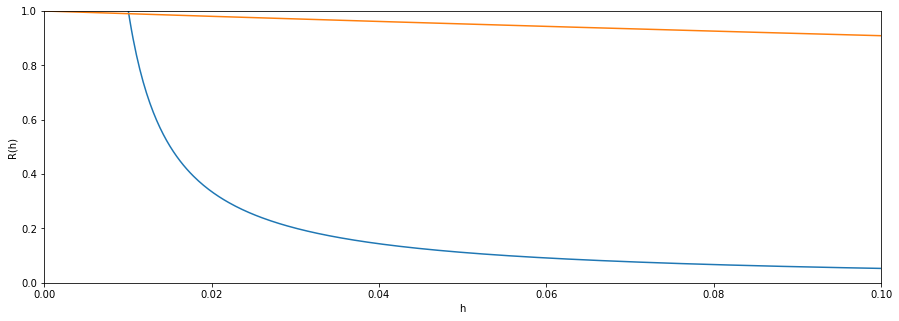

In [469]:
x = np.linspace(0, 0.1, 500)
R1 = np.fabs(1/(1-199*x))
R2 = np.fabs(1/(1+x))
plt.figure(figsize=(15, 5))
plt.plot(x, R1)
plt.plot(x, R2)
plt.axis([0,0.1,0,1])
plt.xlabel('h')
plt.ylabel('R(h)')
plt.show()